# **Designing a Marketing Campaign for a Restaurant Chain Using Exploratory Data Analysis**
## **Zomato Restaurants Data**
### Analyzing the best restaurants of the major cities
##### Saba Gul

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Data Cleaning and Preparation:**

In [58]:
# Load the dataset
df = pd.read_csv("zomato_restaurants_in_India.csv", encoding='latin1')


In [59]:
df.shape

(211944, 26)

In [60]:
# Display the first few rows of the dataset to understand its structure
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [61]:
# Display the last few rows of the dataset to understand its structure
df.tail(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['CafÃ©'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [62]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [63]:
# Check data types of each column
print(df.dtypes)

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object


In [64]:
# Correct data types
df['city_id'] = df['city_id'].astype('Int64')
df['country_id'] = df['country_id'].astype('Int64')
df['zipcode'] = df['zipcode'].astype(str)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  Int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               211944 non-null  object 
 11  country_id            211944 non-null  Int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

### Removing duplicates


In [66]:
df.duplicated().sum()

151527

Its important to remove duplicate rows to avoid biasness in our analysis. Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [67]:
df.drop_duplicates(["res_id"],keep='first',inplace=True)
df.shape

(55568, 26)

In [68]:
df.columns.str.strip()
#The str.strip() function is used to remove leading and trailing characters.
#Strip whitespaces (including newlines)

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

### **Check for missing values:**

In [69]:

df.isnull().sum()

res_id                     0
name                       0
establishment              0
url                        0
address                   18
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
zipcode                    0
country_id                 0
locality_verbose           0
cuisines                 470
timings                 1003
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         12
delivery                   0
takeaway                   0
dtype: int64

We have 5 variables with some kind of missing values. Since zipcode has more than 80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.

In [70]:
# Handle missing values in 'cuisines' column
df['cuisines'].fillna('Unknown', inplace=True)



In [71]:
# Handle missing values in 'timings' column
# For the 'timings' column, we can replace missing values with a default value, such as 'Not available'
df['timings'].fillna('Not available', inplace=True)

Next, we'll look for mislabeled categories or inconsistent values in categorical columns, such as 'establishment', 'city' and 'cuisines':

In [72]:
# Check unique values in 'establishment' column
print(df['establishment'].unique())

["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['CafÃ©']"
 "['Dhaba']" "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]


In [73]:
# Check unique values in 'city' column
df['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [74]:
# Check unique values in 'cuisines' column
print(df['cuisines'].unique())

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


For feature engineering, we can extract useful information from existing data. For example, we can extract the number of cuisines offered by each restaurant:

In [75]:
# Create a new column to represent the total number of cuisines offered
df['total_cuisines'] = df['cuisines'].str.split(',').apply(len)


In [76]:
# Display 'name' and 'total_cuisines' columns
df_subset = df[['name', 'total_cuisines']]
print(df_subset.head())

                             name  total_cuisines
0                     Bikanervala               5
1  Mama Chicken Mama Franky House               6
2                   Bhagat Halwai               2
3                   Bhagat Halwai               4
4     The Salt Cafe Kitchen & Bar               3


In [77]:
# Extract useful information from 'timings' column
df['opening_time'] = df['timings'].str.extract(r'^(\d{1,2}:\d{2}[ap]m)').fillna('')
df['closing_time'] = df['timings'].str.extract(r'(\d{1,2}:\d{2}[ap]m)$').fillna('')

In [78]:
print(df.head())

    res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra 

## **Exploratory Data Analysis:**

### **Descriptive Statistics:**

In [79]:
# Descriptive Statistics
print("Descriptive Statistics:")
df.describe()


Descriptive Statistics:


,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway,total_cuisines
count,5.556800e+04,55568.0,55568.000000,55568.000000,55568.0,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55556.0,55568.000000,55568.0,55568.000000
mean,1.313694e+07,3409.499298,21.450847,76.497131,1.0,528.205874,1.714728,2.958593,223.330352,160.974770,0.0,-0.349824,-1.0,2.235711
std,8.105959e+06,5174.942737,42.901135,10.982976,0.0,595.028447,0.878227,1.464576,618.224019,586.975382,0.0,0.933794,0.0,1.329704
min,5.000000e+01,1.0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0,1.000000
25%,3.001352e+06,8.0,16.518374,74.645885,1.0,200.000000,1.000000,2.900000,6.000000,1.000000,0.0,-1.000000,-1.0,1.000000
50%,1.869268e+07,26.0,22.468629,77.106348,1.0,350.000000,1.000000,3.500000,35.000000,10.000000,0.0,-1.000000,-1.0,2.000000
75%,1.887262e+07,11294.0,26.752959,79.831641,1.0,600.000000,2.000000,3.900000,175.000000,69.000000,0.0,1.000000,-1.0,3.000000
max,1.915979e+07,11354.0,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0,8.000000


In [80]:
df.describe(include=['bool','object'])

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text,opening_time,closing_time
count,55568,55568,55568,55550,55568,55568,55568,55568,55568,55568,55568,55568,55568,55568,55568
unique,41100,27,55568,50657,99,3731,1312,3910,9383,7741,1,31228,33,83,1
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Laxman Jhula, Tapovan, Rishikesh",Bangalore,Civil Lines,nan,"Gomti Nagar, Lucknow",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Average,,
freq,399,14032,1,37,2247,752,44623,274,4295,7012,55568,860,16313,54131,55568


In [81]:
# Dispersion
dispersion = df.describe(include='all')
dispersion

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,total_cuisines,opening_time,closing_time
count,5.556800e+04,55568,55568,55568,55550,55568,55568.0,55568,55568.000000,55568.000000,...,55568.000000,55568,55568.000000,55568.000000,55556.0,55568.000000,55568.0,55568.000000,55568,55568
unique,NaN,41100,27,55568,50657,99,<NA>,3731,NaN,NaN,...,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,83,1
top,NaN,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Laxman Jhula, Tapovan, Rishikesh",Bangalore,<NA>,Civil Lines,NaN,NaN,...,NaN,Average,NaN,NaN,NaN,NaN,NaN,NaN,,
freq,NaN,399,14032,1,37,2247,<NA>,752,NaN,NaN,...,NaN,16313,NaN,NaN,NaN,NaN,NaN,NaN,54131,55568
mean,1.313694e+07,NaN,NaN,NaN,NaN,NaN,3409.499298,NaN,21.450847,76.497131,...,2.958593,NaN,223.330352,160.974770,0.0,-0.349824,-1.0,2.235711,NaN,NaN
std,8.105959e+06,NaN,NaN,NaN,NaN,NaN,5174.942737,NaN,42.901135,10.982976,...,1.464576,NaN,618.224019,586.975382,0.0,0.933794,0.0,1.329704,NaN,NaN
min,5.000000e+01,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.000000,0.000000,...,0.000000,NaN,-18.000000,0.000000,0.0,-1.000000,-1.0,1.000000,NaN,NaN
25%,3.001352e+06,NaN,NaN,NaN,NaN,NaN,8.0,NaN,16.518374,74.645885,...,2.900000,NaN,6.000000,1.000000,0.0,-1.000000,-1.0,1.000000,NaN,NaN
50%,1.869268e+07,NaN,NaN,NaN,NaN,NaN,26.0,NaN,22.468629,77.106348,...,3.500000,NaN,35.000000,10.000000,0.0,-1.000000,-1.0,2.000000,NaN,NaN
75%,1.887262e+07,NaN,NaN,NaN,NaN,NaN,11294.0,NaN,26.752959,79.831641,...,3.900000,NaN,175.000000,69.000000,0.0,1.000000,-1.0,3.000000,NaN,NaN


### **Distribution Analysis for key variables:**

In [82]:
# Distribution Analysis
# Ratings distribution
ratings_distribution = df['aggregate_rating'].value_counts()
ratings_distribution

aggregate_rating
0.0    10058
3.9     3537
3.8     3428
3.7     3324
4.0     3307
3.6     3004
3.2     2911
3.4     2789
3.3     2783
3.5     2757
4.1     2757
4.2     2194
3.1     1779
4.3     1612
3.0     1595
2.9     1488
2.8     1156
4.4     1070
2.7      856
4.5      682
2.6      570
4.6      428
2.5      396
2.4      300
4.7      239
2.3      167
4.8      142
4.9      130
2.2       65
2.1       28
2.0       10
1.9        4
1.8        2
Name: count, dtype: int64

In [83]:

# Price range distribution
price_range_distribution = df['price_range'].value_counts()

# Total cuisines distribution
total_cuisines_distribution = df['total_cuisines'].value_counts()



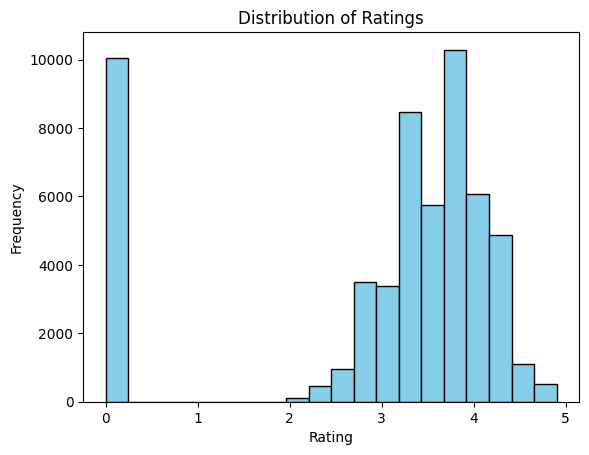

In [84]:

import matplotlib.pyplot as plt

# Distribution of ratings
plt.hist(df['aggregate_rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



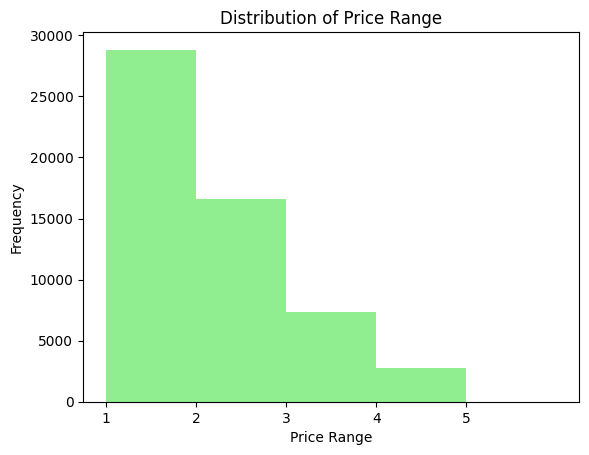

In [85]:

# Distribution of price range
plt.hist(df['price_range'], bins=range(1, 7), color='lightgreen')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.show()



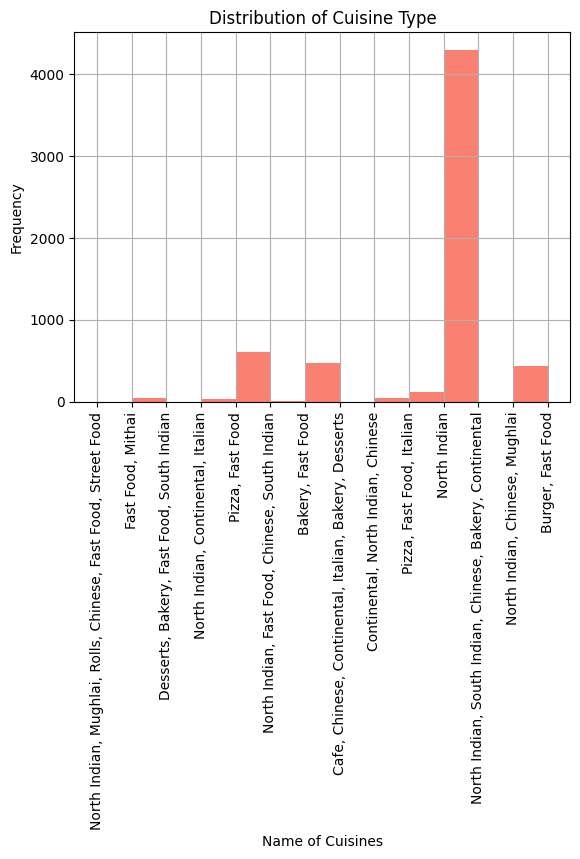

In [86]:
# Distribution of cuisine type offered by each returant
df['cuisines'].hist(color='salmon', bins=range(1, 15))
plt.title('Distribution of Cuisine Type')
plt.xlabel('Name of Cuisines')
plt.ylabel('Frequency')
plt.xticks(range(1, 15))
# Rotate x-axis labels at 90 degrees
plt.xticks(rotation=90)
plt.show()

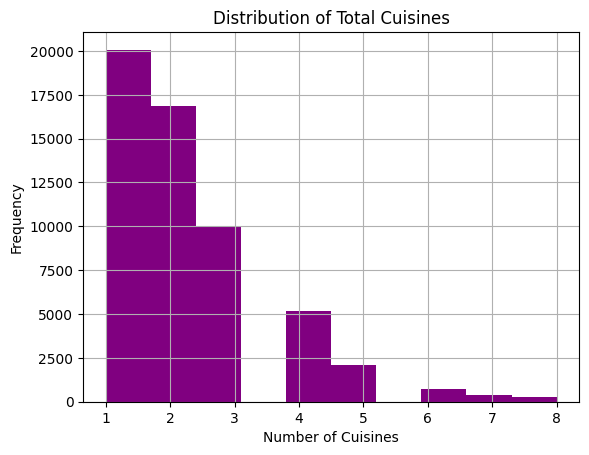

In [87]:
# Distribution of total cuisines offered by each resturant
df['total_cuisines'].hist(color='purple')
plt.title('Distribution of Total Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Frequency')
plt.show()

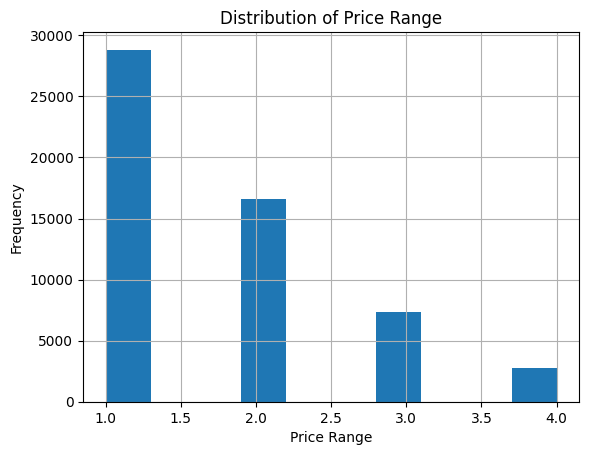

In [88]:
# Distribution of price range
df['price_range'].hist()
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

### **Correlation Analysis:**

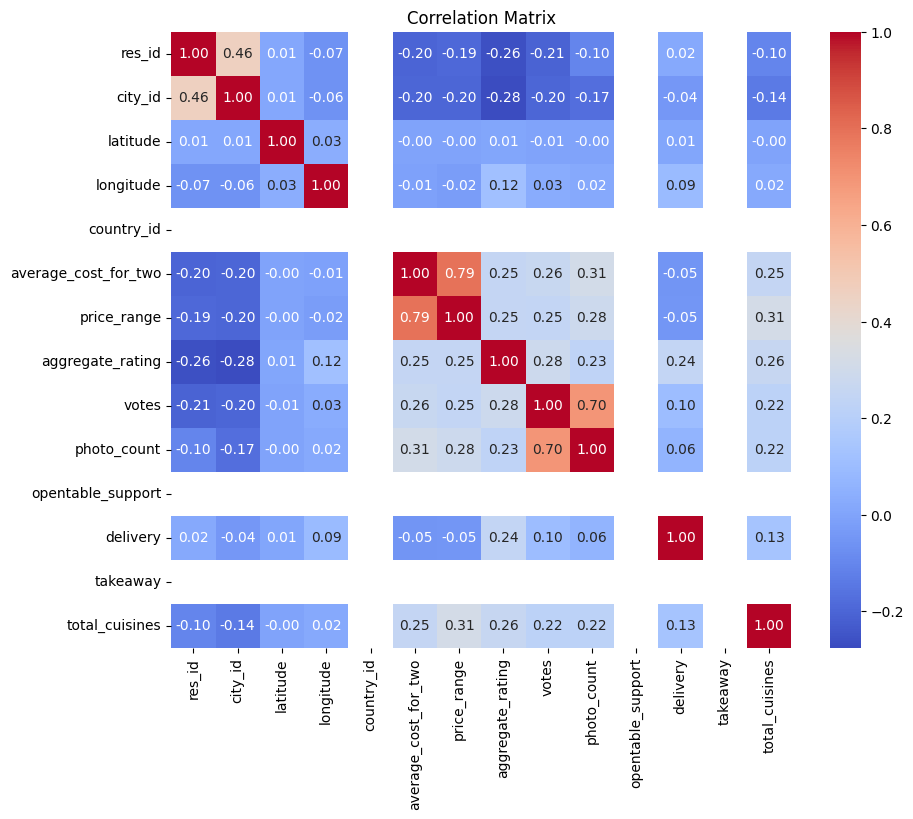

In [89]:
# Calculate correlation for numeric data only
numeric_correlation = df.corr(numeric_only=True)
numeric_correlation

# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(numeric_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Regional Analysis:
- Compare the restaurant trends and customer preferences across different
cities or regions in India.
- Identify unique characteristics of the dining scene in each region.

In [90]:
# Group the data by city or region
grouped_data = df.groupby('city')

# Iterate over groups and analyze key variables
for city, data in grouped_data:
    print(f"City: {city}")
    # Perform analysis for each city or region
    # Example: Calculate average ratings, popular cuisines, etc.
    avg_rating = data['aggregate_rating'].mean()
    popular_cuisines = data['cuisines'].value_counts().head(3)
    # Print or visualize the findings
    print(f"Average Rating: {avg_rating}")
    print("Popular Cuisines:")
    print(popular_cuisines)
    print("-" * 30)

City: Agra
Average Rating: 2.6612244897959187
Popular Cuisines:
cuisines
North Indian    114
Mithai           53
Fast Food        39
Name: count, dtype: int64
------------------------------
City: Ahmedabad
Average Rating: 3.20962309542903
Popular Cuisines:
cuisines
Street Food     80
North Indian    74
Fast Food       71
Name: count, dtype: int64
------------------------------
City: Ajmer
Average Rating: 2.5864999999999996
Popular Cuisines:
cuisines
North Indian    73
Fast Food       33
Mithai          12
Name: count, dtype: int64
------------------------------
City: Alappuzha
Average Rating: 0.3796078431372549
Popular Cuisines:
cuisines
Bakery                  53
Kerala                  38
South Indian, Kerala    22
Name: count, dtype: int64
------------------------------
City: Allahabad
Average Rating: 2.7252285191956127
Popular Cuisines:
cuisines
North Indian             101
North Indian, Chinese     32
Desserts                  28
Name: count, dtype: int64
-------------------------

In [91]:
# Group the data by city
city_grouped = df.groupby('city')

# Calculate aggregate statistics
city_stats = city_grouped.agg({
    'name': 'count',  # Number of restaurants
    'aggregate_rating': 'mean',  # Average rating
    'average_cost_for_two': 'mean',  # Average cost for two
    'cuisines': lambda x: x.value_counts().index[0]  # Most common cuisine
})

# Display the aggregated statistics
print(city_stats)



            name  aggregate_rating  average_cost_for_two      cuisines
city                                                                  
Agra         833          2.661224            520.600240  North Indian
Ahmedabad   1247          3.209623            492.750601   Street Food
Ajmer        400          2.586500            307.625000  North Indian
Alappuzha    255          0.379608            302.549020        Bakery
Allahabad    547          2.725229            353.546618  North Indian
...          ...               ...                   ...           ...
Varanasi     583          3.018182            476.037736  North Indian
Vellore      295          2.172881            290.677966  South Indian
Vijayawada   482          3.001245            396.618257  South Indian
Vizag        694          3.160519            443.363112  South Indian
Zirakpur     150          2.803333            556.333333  North Indian

[99 rows x 4 columns]


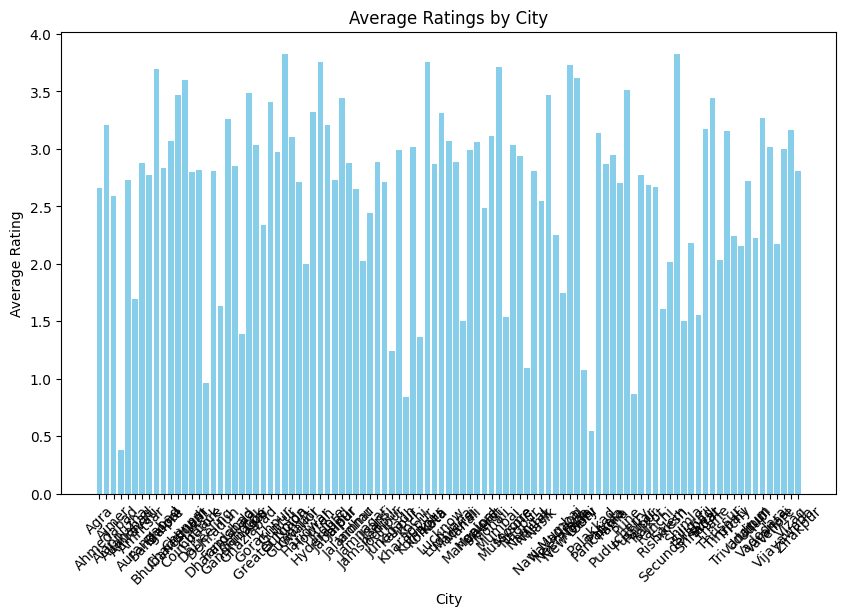

In [92]:
# Visualization
# Plotting the average ratings
plt.figure(figsize=(10, 6))
plt.bar(city_stats.index, city_stats['aggregate_rating'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Ratings by City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


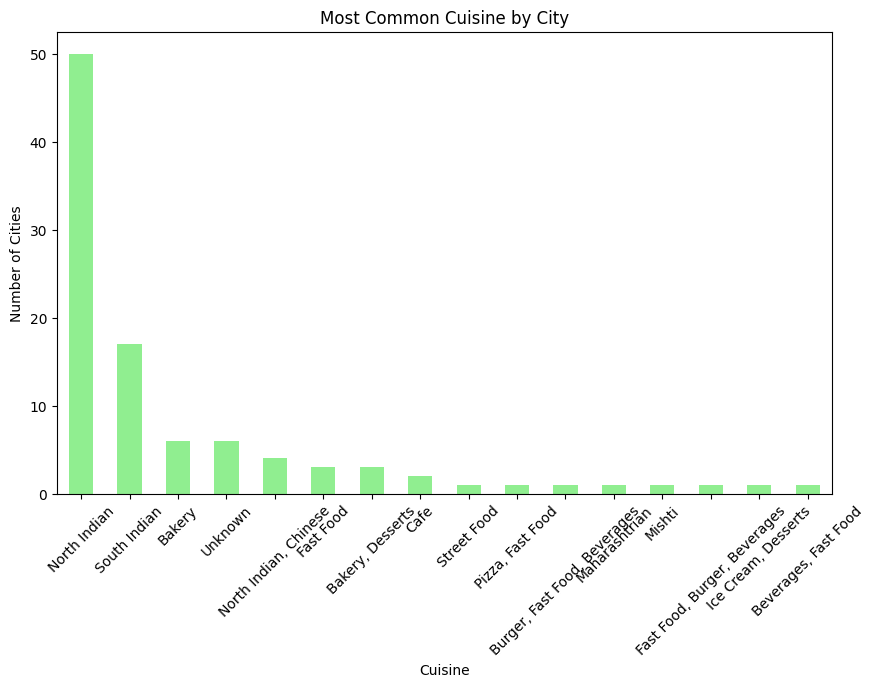

In [93]:

# Plotting the most common cuisine
plt.figure(figsize=(10, 6))
city_stats['cuisines'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Cuisine')
plt.ylabel('Number of Cities')
plt.title('Most Common Cuisine by City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Customer Preference Analysis:
- Analyze the types of cuisines that are popular in different regions.
- Examine the relationship between restaurant ratings, price range, and
popularity.

In [94]:
# Analyze the types of cuisines that are popular in different regions
popular_cuisines = df['cuisines'].value_counts().head(10)
print("Top 10 Popular Cuisines:")
print(popular_cuisines)



Top 10 Popular Cuisines:
cuisines
North Indian             4295
Fast Food                2025
North Indian, Chinese    1636
Bakery                   1585
South Indian             1489
Street Food              1187
Cafe                     1098
Mithai                   1020
Desserts                  922
Bakery, Desserts          836
Name: count, dtype: int64


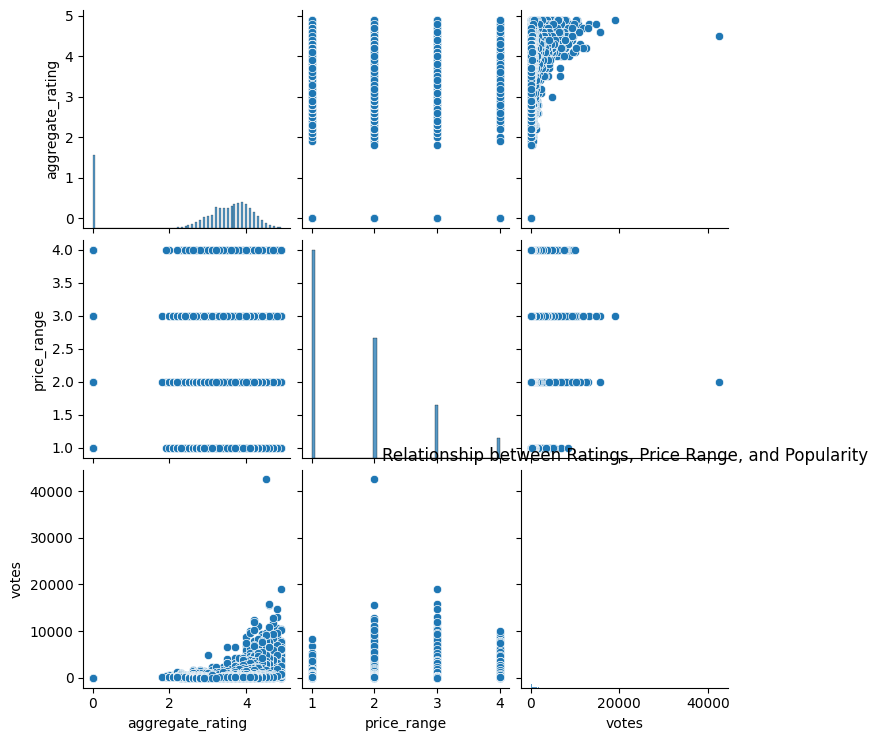

In [95]:
# Examine the relationship between restaurant ratings, price range, and popularity

sns.pairplot(df[['aggregate_rating', 'price_range', 'votes']])
plt.title('Relationship between Ratings, Price Range, and Popularity')
plt.show()


In [96]:
# Analyze popular cuisines in different regions
popular_cuisines_by_region = df.groupby('city')['cuisines'].apply(lambda x: pd.Series(x.str.split(',').sum()).value_counts().head(5))



In [97]:
# Display the top 5 popular cuisines in each region
print("Top 5 Popular Cuisines in Different Regions:")
print(popular_cuisines_by_region)


Top 5 Popular Cuisines in Different Regions:
city                   
Agra      North Indian     277
           Chinese         142
           Fast Food       118
          Mithai            99
           Continental      83
                          ... 
Zirakpur  North Indian      54
           Fast Food        36
           Chinese          34
           Desserts         17
           North Indian     16
Name: cuisines, Length: 495, dtype: int64


In [98]:

# Examine the relationship between restaurant ratings, price range, and popularity
ratings_price_range_popularity = df[['aggregate_rating', 'price_range', 'votes']]
correlation_matrix = ratings_price_range_popularity.corr()


In [99]:

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                  aggregate_rating  price_range     votes
aggregate_rating          1.000000     0.252312  0.283373
price_range               0.252312     1.000000  0.245646
votes                     0.283373     0.245646  1.000000


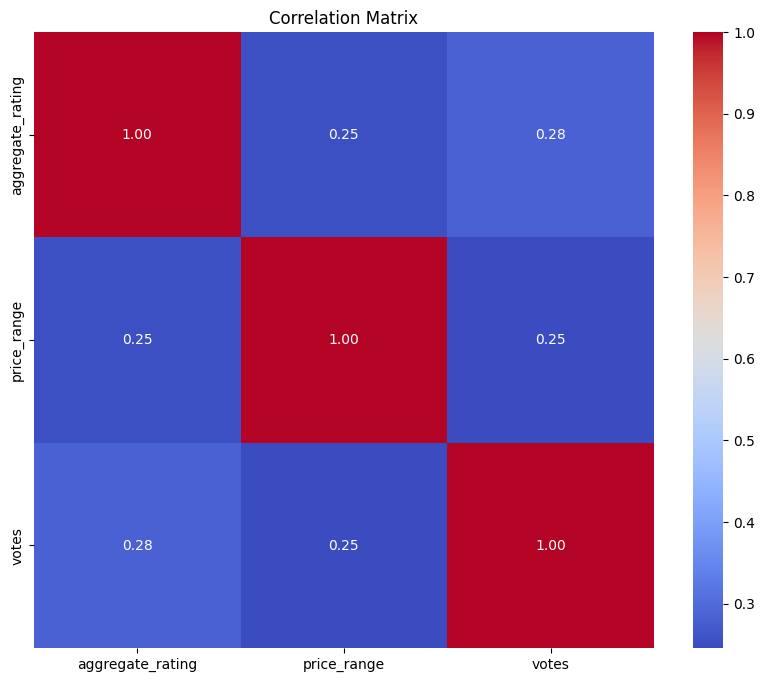

In [100]:
# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix indicates the correlation coefficients between different variables:

- **aggregate_rating** (Restaurant Rating): This column represents the aggregate rating of restaurants. It shows a moderate positive correlation with both the price range and the number of votes, indicating that restaurants with higher ratings tend to have higher price ranges and attract more votes.
  
- **price_range**: This column represents the price range of restaurants. It shows a moderate positive correlation with both the aggregate rating and the number of votes. This suggests that restaurants with higher price ranges tend to have higher ratings and attract more votes.

- **votes**: This column represents the number of votes received by restaurants. It shows a moderate positive correlation with both the aggregate rating and the price range. This implies that restaurants with more votes tend to have higher ratings and higher price ranges.

## Competitive Analysis:
- Identify major competitors in each region based on cuisine, pricing, and
ratings.
- Analyze the strengths and weaknesses of these competitors.

In [101]:
# Group the data by city or region to identify major competitors
competitors_by_region = df.groupby('city')

# Iterate over each group (city or region) to analyze competitors
for city, data in competitors_by_region:
    print(f"\nCompetitive Analysis for {city}:")

    # Identify major competitors based on cuisine, pricing, and ratings
    major_competitors = data[['name', 'cuisines', 'price_range', 'aggregate_rating']]

    # Sort competitors by aggregate rating in descending order
    major_competitors = major_competitors.sort_values(by='aggregate_rating', ascending=False)

    # Display top competitors
    print("Top Competitors:")
    print(major_competitors.head())

    # Analyze strengths and weaknesses
    print("\nStrengths and Weaknesses:")
    # You can perform further analysis based on your criteria, such as comparing cuisines, pricing, and ratings.
    # For example, you can calculate average ratings and pricing for each cuisine to identify strengths and weaknesses.
    avg_rating_by_cuisine = data.groupby('cuisines')['aggregate_rating'].mean()
    avg_price_by_cuisine = data.groupby('cuisines')['price_range'].mean()
    print("Average Ratings by Cuisine:")
    print(avg_rating_by_cuisine)
    print("\nAverage Price Range by Cuisine:")
    print(avg_price_by_cuisine)


Streaming output truncated to the last 5000 lines.
Top Competitors:
                    name                               cuisines  price_range  \
59848         Illiterati                                   Cafe            3   
59849      Tibet Kitchen  Chinese, North Indian, Tibetan, Momos            2   
59850         Shiva Cafe                           North Indian            2   
59854      Trek and Dine                                Unknown            3   
59858  Four Seasons Cafe          Italian, Cafe, Tibetan, Momos            2   

       aggregate_rating  
59848               4.3  
59849               4.0  
59850               3.9  
59854               3.8  
59858               3.8  

Strengths and Weaknesses:
Average Ratings by Cuisine:
cuisines
Bakery                                                                         1.083333
Bakery, Cafe                                                                   3.400000
Bakery, Cafe, Chinese, Italian, Mexican, North Indian  

In the above code:

- We group the data by city or region to identify major competitors in each area.
- For each city or region, we extract relevant information about competitors, including their names, cuisines, price ranges, and aggregate ratings.
- We sort the competitors based on their aggregate ratings in descending order to identify the top competitors.
- We then analyze the strengths and weaknesses of these competitors, which may involve further analysis of cuisines, pricing, and ratings. For example, we calculate the average ratings and price ranges for each cuisine to identify trends and patterns.

In [102]:
# Group the data by region (city)
grouped_data = df.groupby('city')

# Initialize empty dictionaries to store competitors' information
competitor_cuisines = {}
competitor_pricing = {}
competitor_ratings = {}
top_restaurants = {}

# Loop through each region to analyze competitors
for city, data in grouped_data:
    # Calculate the most common cuisines in the region
    cuisines = pd.Series(data['cuisines'].str.split(',').sum()).value_counts().head(5)
    competitor_cuisines[city] = cuisines

    # Calculate the average pricing in the region
    avg_price = data['average_cost_for_two'].mean()
    competitor_pricing[city] = avg_price

    # Calculate the average ratings in the region
    avg_rating = data['aggregate_rating'].mean()
    competitor_ratings[city] = avg_rating

    # Find the top 5 restaurants in the region
    top_restaurants[city] = data[['name', 'cuisines', 'average_cost_for_two', 'aggregate_rating']].head(5)

# Display the major competitors in each region along with the top 5 restaurants
for city in grouped_data.groups.keys():
    print(f"Region: {city}")
    print("Top 5 Popular Cuisines:", competitor_cuisines[city])
    print("Average Pricing:", competitor_pricing[city])
    print("Average Ratings:", competitor_ratings[city])
    print("Top 5 Restaurants:")
    print(top_restaurants[city])
    print()


Region: Agra
Top 5 Popular Cuisines: North Indian    277
 Chinese        142
 Fast Food      118
Mithai           99
 Continental     83
Name: count, dtype: int64
Average Pricing: 520.6002400960384
Average Ratings: 2.6612244897959187
Top 5 Restaurants:
                             name  \
0                     Bikanervala   
1  Mama Chicken Mama Franky House   
2                   Bhagat Halwai   
3                   Bhagat Halwai   
4     The Salt Cafe Kitchen & Bar   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   aggregate_rating  
0               4.4  
1          

### **Finding Best Rated resturant in Each City**

<ipython-input-103-8033d4dcbe65>:33: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
<ipython-input-103-8033d4dcbe65>:33: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


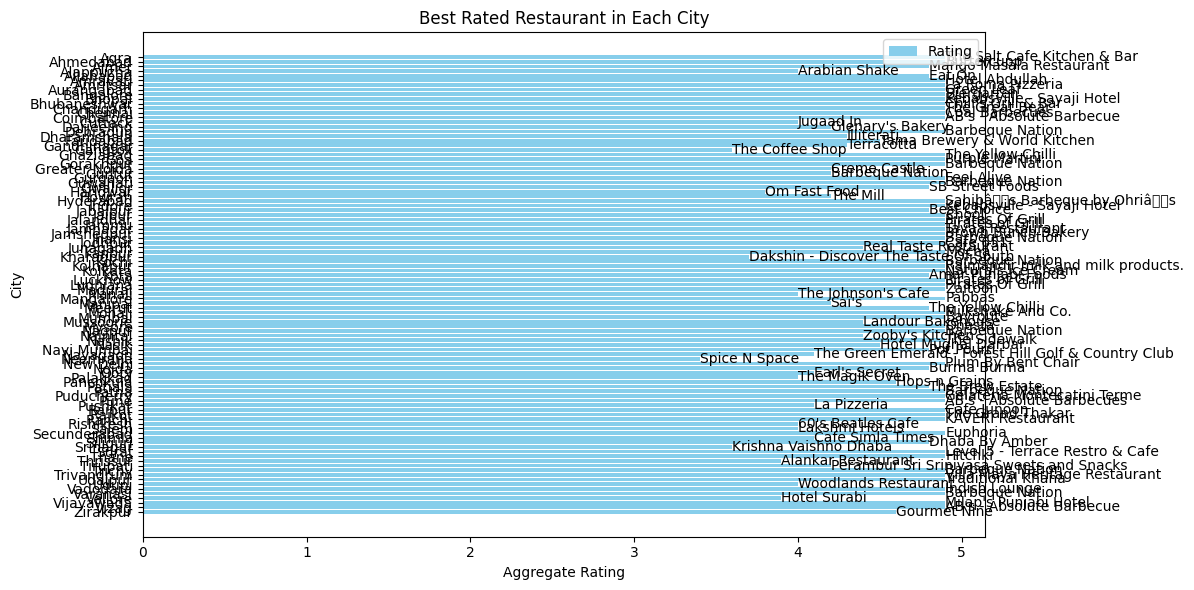

In [103]:
# Finding Best Rated resturant in Each City
# Group the data by city
grouped_data = df.groupby('city')

# Initialize empty lists to store the city names, best restaurant names, and their ratings
cities = []
best_restaurant_names = []
best_restaurant_ratings = []

# Loop through each city group to find the best-rated restaurant
for city, data in grouped_data:
    best_rated_restaurant = data.loc[data['aggregate_rating'].idxmax()]
    cities.append(city)
    best_restaurant_names.append(best_rated_restaurant['name'])
    best_restaurant_ratings.append(best_rated_restaurant['aggregate_rating'])

# Plot the data
plt.figure(figsize=(12, 6))

# Plot the best restaurant ratings as bars
plt.barh(cities, best_restaurant_ratings, color='skyblue', label='Rating')

# Plot the best restaurant names as text annotations
for i, city in enumerate(cities):
    plt.text(best_restaurant_ratings[i], i, best_restaurant_names[i], ha='left', va='center', fontsize=10)

# Customize the plot
plt.title('Best Rated Restaurant in Each City')
plt.xlabel('Aggregate Rating')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest-rated restaurant at the top
plt.legend()
plt.tight_layout()
plt.show()


In [120]:
top_rated=df[df['aggregate_rating']>4.5]

In [121]:
figure=px.bar(top_rated,x='city',y='aggregate_rating')
figure.show()

In [113]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway', 'total_cuisines', 'opening_time', 'closing_time'],
      dtype='object')

In [116]:
data.groupby(['aggregate_rating','rating_text']).size().reset_index()

,aggregate_rating,rating_text,0
0,0.0,Not rated,27
1,2.3,Poor,1
2,2.4,Poor,1
3,2.5,Average,1
4,2.7,Average,11
5,2.8,Average,5
6,2.8,PrÅ¯mÄr,1
7,2.9,Average,6
8,3.0,Average,3
9,3.1,Average,4


<ipython-input-115-87c8d4065651>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 155 (\x9b) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 155 (\x9b) missing from current font.



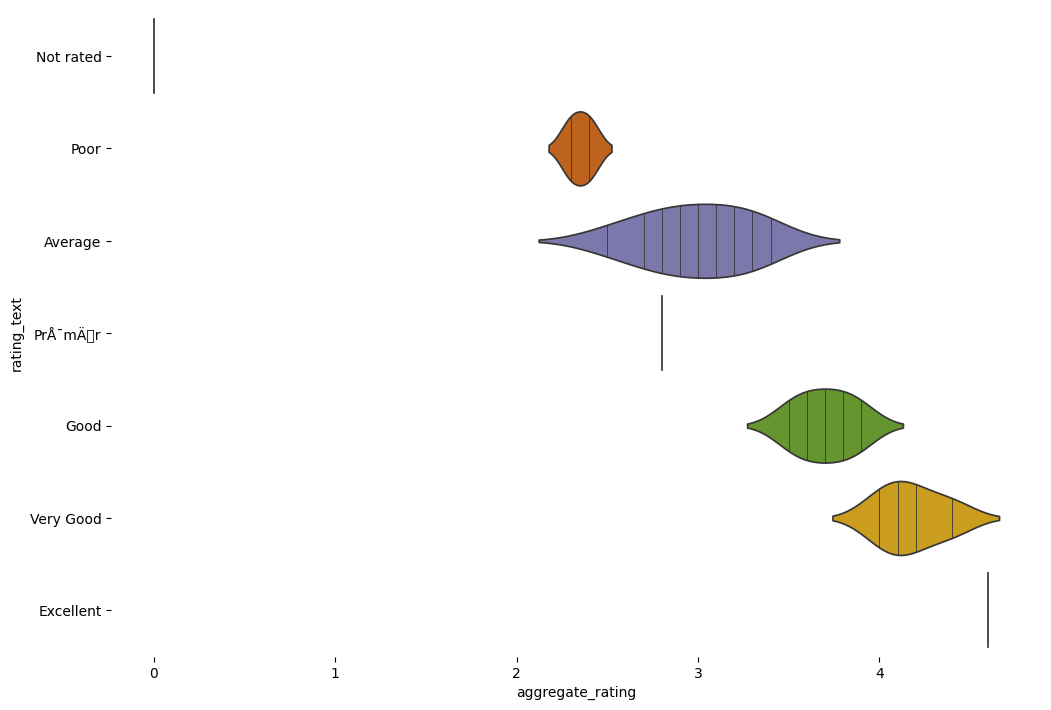

In [115]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['rating_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='aggregate_rating', y='rating_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [124]:
top_rated=df[df['aggregate_rating']>4.5]
fig = px.scatter_mapbox(top_rated, lat="latitude", lon="longitude", hover_name="city", hover_data=["aggregate_rating", "name"],
                        color_discrete_sequence=["fuchsia"], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Highly rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

## Market Gap Analysis:
- Identify any gaps in the market that the restaurant chain can capitalize on
(e.g., underrepresented cuisines, price ranges).

Based on the insights from the regional analysis of various cities, here are some potential market gaps that a restaurant chain could capitalize on:

1. **Underrepresented Cuisines**:
   - In regions like Amravati, where Maharashtrian cuisine is popular but not extensively represented in the top restaurants, there is an opportunity to introduce more Maharashtrian food joints.
   - In cities like Gandhinagar and Nayagaon, there is a lack of diversity in cuisines beyond North Indian, Fast Food, and Chinese. Introducing new cuisines like Continental, Italian, or Mediterranean could fill this gap.

2. **Specialty Food Segments**:
   - Regions such as Alappuzha show a preference for South Indian and Kerala cuisines. There might be an opportunity to introduce specialty dishes or authentic Kerala cuisine restaurants catering to local tastes.
   - In cities like Agra, which have a significant presence of Mithai shops but lack representation of specific cuisines like Italian or Japanese, introducing dessert-themed cafes or fusion restaurants could be a unique selling proposition.

3. **Price Range Differentiation**:
   - In regions like Amritsar and Bangalore, where the average pricing is relatively high, there might be an opportunity to introduce budget-friendly options without compromising on quality. This could attract a wider customer base looking for affordable dining options.

4. **Health-Conscious Options**:
   - With the growing trend of health-conscious dining, there might be a market gap in regions like Bhopal and Chandigarh for restaurants offering organic, vegan, or gluten-free options. Introducing such options could cater to health-conscious consumers and differentiate the restaurant chain from competitors.

5. **Delivery and Takeaway Services**:
   - In regions where there is a high demand for delivery and takeaway services, investing in efficient delivery logistics and packaging solutions could capitalize on this market gap. This could be particularly relevant in urban areas where people often prefer ordering food online or grabbing quick meals on the go.

By identifying and addressing these market gaps, a restaurant chain can strategically expand its presence and attract a diverse customer base, ultimately driving business growth and success.